In [1]:
import argparse
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import data
import model
import utils

In [2]:
config = utils.load_config('denoise_diffusion')

In [3]:
test_loader = data.build_dataloader(config, phase='train')

trainer = model.get_model(config)
trainer.load_checkpoint('checkpoints/debug/step100000.pth')

In [4]:
feeddict = test_loader.dataset[0]
img = feeddict['img'].cpu().numpy()[0]
feeddict['img'] = feeddict['img'].unsqueeze(0).cuda()
result = trainer.compute_nll(feeddict)
nll = result['total_bpd']
nll = nll.cpu().numpy()

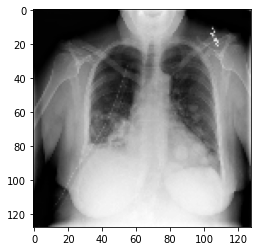

In [5]:
plt.imshow(img, cmap='gray')

In [6]:
result['vb'].shape

torch.Size([1, 1000, 1, 128, 128])

(tensor(0., device='cuda:0'), tensor(7.2711, device='cuda:0'))

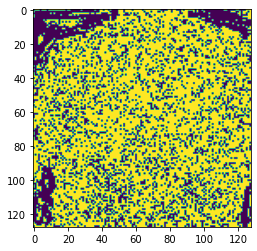

In [9]:
plt.imshow(result['vb'][0, 0, 0].cpu())
result['vb'][0, 1].min(), result['vb'][0, 1].max()

(tensor(0., device='cuda:0'), tensor(2.1661e-07, device='cuda:0'))

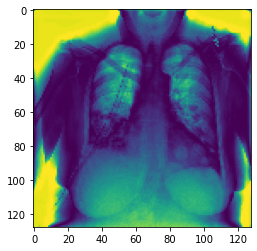

In [10]:
plt.imshow(result['prior_bpd'][0, 0].cpu())
result['prior_bpd'].min(), result['prior_bpd'].max()

In [11]:
result['xstart_mse']

tensor([[1.5700e-04, 2.4954e-04, 3.3089e-04, 3.8146e-04, 4.3906e-04, 4.9324e-04,
         5.4170e-04, 5.6992e-04, 6.0812e-04, 6.4317e-04, 7.0121e-04, 7.1051e-04,
         7.6554e-04, 7.8246e-04, 7.9608e-04, 8.1835e-04, 8.4001e-04, 8.6451e-04,
         9.0647e-04, 9.1708e-04, 9.4036e-04, 9.6366e-04, 9.9432e-04, 9.8543e-04,
         1.0046e-03, 1.0374e-03, 1.0837e-03, 1.0852e-03, 1.0916e-03, 1.1872e-03,
         1.1685e-03, 1.1749e-03, 1.2189e-03, 1.2168e-03, 1.2443e-03, 1.2615e-03,
         1.2370e-03, 1.3000e-03, 1.3500e-03, 1.3253e-03, 1.3415e-03, 1.3219e-03,
         1.3519e-03, 1.4033e-03, 1.4326e-03, 1.3938e-03, 1.4383e-03, 1.3867e-03,
         1.4750e-03, 1.4985e-03, 1.4877e-03, 1.5607e-03, 1.4695e-03, 1.4953e-03,
         1.5061e-03, 1.4922e-03, 1.6590e-03, 1.6453e-03, 1.5718e-03, 1.6412e-03,
         1.6559e-03, 1.6465e-03, 1.6751e-03, 1.6526e-03, 1.6572e-03, 1.7019e-03,
         1.6615e-03, 1.6602e-03, 1.7003e-03, 1.7343e-03, 1.7452e-03, 1.7479e-03,
         1.7233e-03, 1.7408e